In [1]:
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from ctfidf import CTFIDFVectorizer

In [39]:
df = pd.read_csv("../data/processed/processed_data.csv")

In [40]:
pd.set_option("display.max_colwidth", None)

In [42]:
df.head(n=1)

,Package,Sample,Medical_Description,DescriptionLength
0,Allergy / Immunology,allergic rhinitis,subjective 23yearold white female presents complaint allergies allergies lived seattle thinks worse here past tried claritin zyrtec worked short time lose effectiveness allegra last summer began using weeks ago working overthecounter sprays nasal sprays asthma doest daily think flaring upmedications currently ortho tricyclen allegraallergies known allergiesobjectivevitals weight 130 pounds blood pressure 12478heent throat mildly erythematous exudate nasal mucosa erythematous swollen clear drainage seen tms clearneck supple adenopathylungs clearassessment allergic rhinitisplan1 try zyrtec allegra option loratadine think coverage cheaper2 samples nasonex sprays nostril given weeks written,695


In [5]:
df.shape

(4966, 4)

## Basic Analysis

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

Package: 0
Sample: 0
Medical_Description: 0
DescriptionLength: 0


In [7]:
df.loc[df["Medical_Description"].isna()].head(10)

,Package,Sample,Medical_Description,DescriptionLength


## Package

In [8]:
df["Package"].nunique()

40

In [9]:
df["Package"].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

#### CARDIOVASCULAR
Relating to the circulatory system, which comprises the heart and blood vessels. Cardiovascular diseases are conditions that affect the heart and blood vessels and include arteriosclerosis, coronary artery disease, heart valve disease, arrhythmia, heart failure, hypertension, orthostatic hypotension, shock, endocarditis, diseases of the aorta and its branches, disorders of the peripheral vascular system, and congenital heart disease.

#### ORTHOPEDIC
Concerned with the correction or prevention of deformities, disorders, or injuries of the skeleton and associated structures (such as tendons and ligaments)

#### RADIOLOGY
Dealing with X-rays and other high-energy radiation, especially the use of such radiation for the diagnosis and treatment of disease.

#### GASTROENTROLOGY
The branch of medicine which deals with disorders of the stomach and intestines.

#### NEUROLOGY
The branch of medicine or biology that deals with the anatomy, functions, and organic disorders of nerves and the nervous system.

#### SOAP Note
SOAP note – an acronym for *Subjective, Objective, Assessment and Plan* – is the most common method of documentation used by providers to input notes into patients' medical records.

#### GYNECOLOGY
The branch of physiology and medicine which deals with the functions and diseases specific to women and girls, especially those affecting the reproductive system.

#### UROLOGY
Urology is a part of health care that deals with diseases of the male and female urinary tract (kidneys, ureters, bladder and urethra). It also deals with the male organs that are able to make babies (penis, testes, scrotum, prostate, etc.).

#### DISCHARGE SUMMARY
Hospital discharge summaries serve as the primary documents communicating a patient's care plan to the post-hospital care team. Often, the discharge summary is the only form of communication that accompanies the patient to the next setting of care.

#### Otolaryngology
An otolaryngologist is often called an ear, nose, and throat doctor, or an ENT for short.

#### NEUROSURGERY
Surgery performed on the nervous system, especially the brain and spinal cord.

#### ONCOLOGY
The study and treatment of tumours.

#### OPTHALOMOLOGY
The branch of medicine concerned with the study and treatment of disorders and diseases of the eye.

#### NEPHROLOGY
The branch of medicine that deals with the physiology and diseases of the kidneys.

#### PEDIATRICS
Paediatrics is the area of medicine that is concerned with the treatment of children's illnesses.

#### PAIN MANAGEMENT
Pain management, pain medicine, pain control or algiatry, is a branch of medicine that uses an interdisciplinary approach for easing the suffering and improving the quality of life of those living with chronic pain.

#### PSYCHIATRY
The study and treatment of mental illness, emotional disturbance, and abnormal behaviour.

#### PODIATRY
The treatment of the feet and their ailments

#### DERMATOLOGY
Dermatology is the science that is concerned with the diagnosis and treatment of diseases of the skin, hair and nails.

#### COSMETIC / PLASTIC SURGERY
The process of reconstructing or repairing parts of the body by the transfer of tissue, either in the treatment of injury or for cosmetic reasons.

#### DENTISTRY
The treatment of diseases and other conditions that affect the teeth and gums, especially the repair and extraction of teeth and the insertion of artificial ones.

#### PHSYICAL MEDICINE - REHAB
Physical medicine and rehabilitation, also known as physiatry, is a branch of medicine that aims to enhance and restore functional ability and quality of life to people with physical impairments or disabilities.

#### SLEEP MEDICINE
Sleep medicine is a medical specialty or subspecialty devoted to the diagnosis and therapy of sleep disturbances and disorders.

#### ENDOCRINOLOGY
The branch of physiology and medicine concerned with endocrine glands and hormones.

#### BARIATRICS
The branch of medicine that deals with the study and treatment of obesity.

#### CHIROPRATIC
A system of complementary medicine based on the diagnosis and manipulative treatment of misalignments of the joints, especially those of the spinal column, which are believed to cause other disorders by affecting the nerves, muscles, and organs.

#### RHEUMATOLOGY
The study of rheumatism, arthritis, and other disorders of the joints, muscles, and ligaments.

#### AUTOPSY
Postmortem

#### HOSPICE
Hospice care is a type of health care that focuses on the palliation of a terminally ill patient's pain and symptoms and attending to their emotional and spiritual needs at the end of life.

* **NEUROSURGERY** could be confused with SURGERY & NEUROLOGY fields
* **OPTHALOMOLOGY** can be part of ENT
* **NEPHROLOGY** deals with kidneys & so does UROLOGY
* **PAIN MANAGEMENT** could have an overlap of multiple categories
* **CHIROPRATIC** could be confused with Neurology
* **RHEUMATOLOGY** - Deals with joints & muscles, which could overlap with many above fields

### Sleep Medicine

In [10]:
df.loc[df["Package"].str.strip()=="Sleep Medicine"]["Sample"].str.split("-").str[0].value_counts()

electroencephalogram 3              1
snoring                             1
electroencephalography              1
overnight polysomnogram             1
electroencephalogram 2              1
pulmonary consultation 1            1
sleep study followup                1
video eeg                           1
sleep study interpretation          1
electroencephalogram                1
electroencephalogram 1              1
video eeg 1                         1
obesity hypoventilation syndrome    1
video eeg 2                         1
sleep apnea                         1
video eeg 3                         1
sleep difficulties                  1
electroencephalogram 4              1
cpap titration study                1
polysomnography                     1
Name: Sample, dtype: int64

* Electroencephalogram - EEG test detects electrical activity in your brain using small, metal discs attached to your scalp. Your brain cells communicate via electrical impulses and are active all the time, even when you're asleep.
* Polysomnogram - Also known as sleep study, is a comprehensive test used to diagnose sleep disorders. 

### Endocrinology

In [11]:
df.loc[df["Package"].str.strip()=="Endocrinology"]["Sample"].str.split("-").str[0].value_counts()

thyroidectomy                                        2
thyroid mass consult                                 1
weight gain edema                                    1
post hemithyroidectomy                               1
lesions adrenal pancreatic                           1
thyroidectomy 1                                      1
completion thyroidectomy                             1
acute cystitis diabetes type ii                      1
acquired hypothyroidism followup                     1
diabetes mellitus soap note 2                        1
thyroid lumpectomy                                   1
diabetes mellitus soap note 1                        1
metastatic lymphadenopathy thyroid tissue removal    1
axillary dissection mass excision                    1
hyperthyroidism following pregnancy                  1
laryngectomy thyroid lobectomy                       1
diabetes mellitus followup                           1
tracheostomy thyroid isthmusectomy                   1
Name: Samp

* Diabetes Mellitus - Diabetes mellitus ("sugar diabetes") is a condition that occurs when the body can't use glucose normally.
* Thyroidectomy - Surgical removal of thyroid gland
* THYROID is the keyword

### Bariatrics

In [12]:
df.loc[df["Package"].str.strip()=="Bariatrics"]["Sample"].str.split("-").str[0].value_counts()

laparoscopic gastric bypass consult 1       1
bariatric consult surgical weight loss 4    1
lap band adjustment                         1
liposuction                                 1
gastric bypass summary                      1
lipectomy abdomenthighs                     1
gastric bypass preop eval                   1
gastric bypass discussion 3                 1
gastric bypass discussion 2                 1
bariatric consult surgical weight loss 2    1
gastric bypass discussion 1                 1
laparoscopic gastric banding preop visit    1
laparoscopic gastric bypass 1               1
laparoscopic gastric bypass                 1
discharge summary gastric bypass            1
laparoscopic gastric bypass consult 2       1
bariatric consult surgical weight loss 3    1
bariatric consult surgical weight loss 1    1
Name: Sample, dtype: int64

*Can create a dictionary to map values*

### Chiropractic

In [13]:
df.loc[df["Package"].str.strip()=="Chiropractic"]["Sample"].value_counts()

wrist pain                                  1
foot pain consultation                      1
mri cervical spine chiropractic specific    1
chiropractic initial evaluation 1           1
pain management consult 1                   1
chiropractic initial evaluation 2           1
chiropractic ime 1                          1
chiropractic ime 2                          1
pain management consult 2                   1
knee back pain                              1
permanent stationary report                 1
neck back pain                              1
qualified evaluation report                 1
chiropractic progress note                  1
Name: Sample, dtype: int64

Chiropractic deals with joints, spinal & nerves issues. 

### Diets and Nutrition

In [14]:
df.loc[df["Package"].str.strip()=="Diets and Nutritions"]["Sample"].value_counts()

dietary consult weight reduction        1
dietary consult diabetes 1              1
dietary consult gestational diabetes    1
dietary consult 1                       1
dietary consult 2                       1
dietary consult 3                       1
carbohydrate counting                   1
dietary consult hyperlipidemia          1
dietary consult 4                       1
dietary consult diabetes 2              1
Name: Sample, dtype: int64

### Rheumatology

In [15]:
df.loc[df["Package"].str.strip()=="Rheumatology"]["Sample"].value_counts()

discoid lupus                     1
oligoarticular arthritis 1        1
pediatric rheumatology consult    1
rheumatoid arthritis consult      1
rheumatoid arthritis hp           1
rheumatology progress note        1
oligoarticular arthritis 2        1
hand discomfort followup          1
consult weankness polymyositis    1
rheumatoid arthritis              1
Name: Sample, dtype: int64

### Speech

In [16]:
df.loc[df["Package"].str.strip()=="Speech - Language"]["Sample"].value_counts()

barium swallow study speech evaluation       1
barium swallow study speech evaluation 1     1
speech therapy discharge summary 2           1
laryngitis discharge                         1
speech therapy evaluation                    1
speech therapy discharge summary 1           1
speech therapy evaluation 1                  1
cognitive linguistic impairment discharge    1
speech therapy discharge summary             1
Name: Sample, dtype: int64

### Autopsy

In [17]:
df.loc[df["Package"].str.strip()=="Autopsy"]["Sample"].str.split("-").str[0].value_counts()

autopsy 6    1
autopsy 8    1
autopsy 7    1
autopsy 1    1
autopsy 4    1
autopsy 2    1
autopsy 3    1
autopsy 5    1
Name: Sample, dtype: int64

## Description Length

In [18]:
temp = df.groupby("Package")["DescriptionLength"].mean().reset_index().sort_values(by="DescriptionLength")

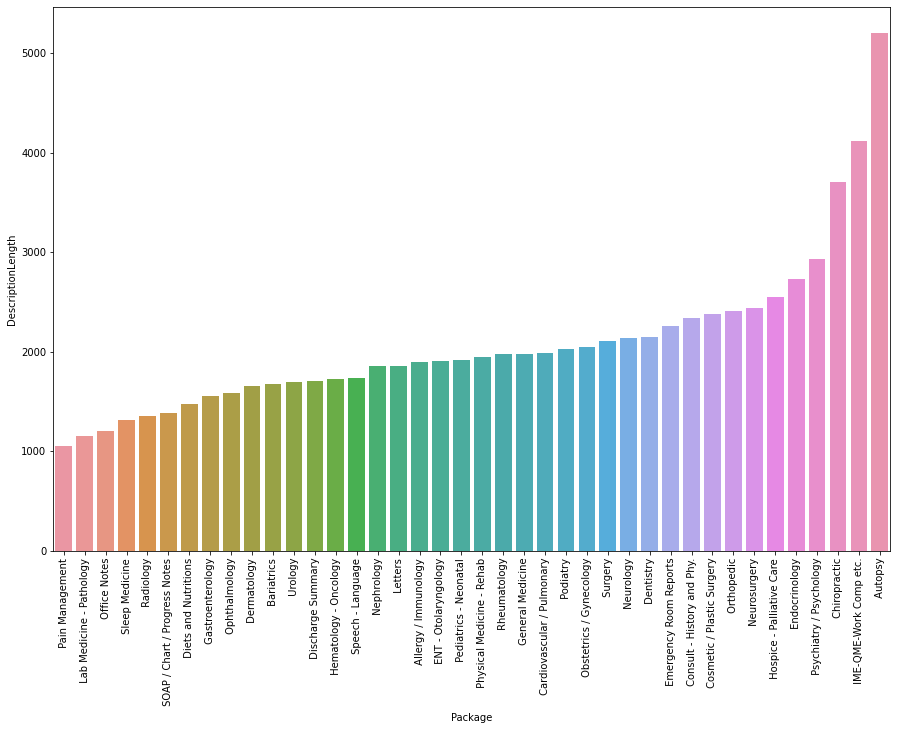

In [19]:
plt.figure(figsize=(15, 10))
g = sns.barplot(x="Package", y="DescriptionLength", data=temp)
_ = plt.xticks(rotation=90)

*Medical_Description Length* could be a very useful feature

## Class Based TF-IDF

In [20]:
docs_per_class = df.groupby(["Package"], as_index=False).agg({"Medical_Description": ' '.join})

In [21]:
count_vectorizer = CountVectorizer().fit(docs_per_class["Medical_Description"])
count = count_vectorizer.transform(docs_per_class["Medical_Description"])
words = count_vectorizer.get_feature_names()

In [22]:
# Extract top 10 words
ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(df)).toarray()

In [23]:
ctfidf.shape

(40, 44312)

In [26]:
words_per_class = {label: [words[index] for index in ctfidf[idx].argsort()[-10:]] for idx, label in enumerate(docs_per_class["Package"])}

In [27]:
pd.DataFrame(words_per_class).T

,0,1,2,3,4,5,6,7,8,9
Allergy / Immunology,nasal,masses,environmental,inhalant,ivig,allegra,allergic,asthma,allergy,allergies
Autopsy,injuries,superficial,hemorrhages,autopsy,abrasion,inches,petechial,grams,ligature,inch
Bariatrics,pounds,comorbidities,laparoscopic,bmi,bariatric,weight,morbid,bypass,obesity,gastric
Cardiovascular / Pulmonary,catheter,aorta,vessel,descending,atrial,aortic,artery,ventricular,pulmonary,coronary
Chiropractic,lumbar,complaints,2000,disc,thoracic,bending,abc,spine,chiropractic,mr
Consult - History and Phy.,regular,hypertension,negative,currently,past,weight,illness,systems,years,denies
Cosmetic / Plastic Surgery,implant,reconstruction,midface,liposuction,fold,nasolabial,flap,fat,nipple,breast
Dentistry,mandibular,throat,pack,buccal,extraction,caries,mandible,dental,teeth,tooth
Dermatology,neoplasm,enlarging,temple,keratotic,cheek,nevus,nodosum,actinic,keratosis,acne
Diets and Nutritions,postprandial,carbohydrates,twohour,weight,servings,snack,food,meal,calories,carbohydrate


## WordCloud

In [31]:
def plot_wordcloud(text, max_words=250, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):

    wordcloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=600)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator();
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

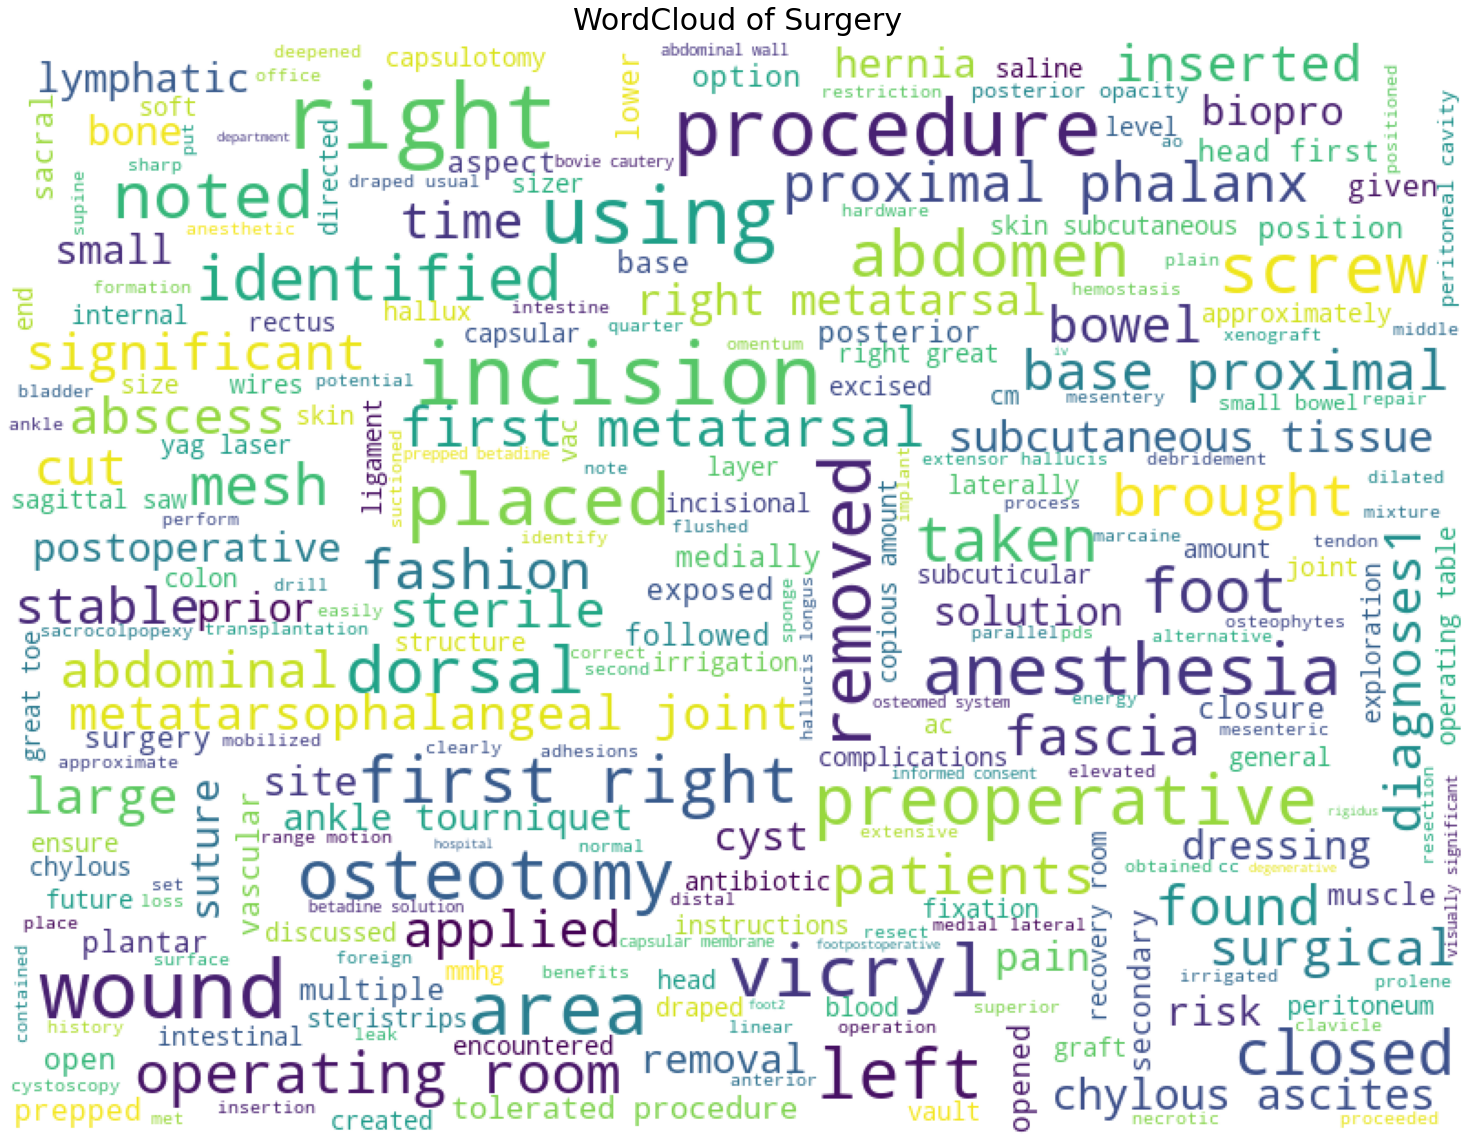

In [32]:
plot_wordcloud(df.loc[df["Package"].str.strip()=="Surgery"]["Medical_Description"],
               color='white',
               max_font_size=50,
               title_size=30,
               title="WordCloud of Surgery")

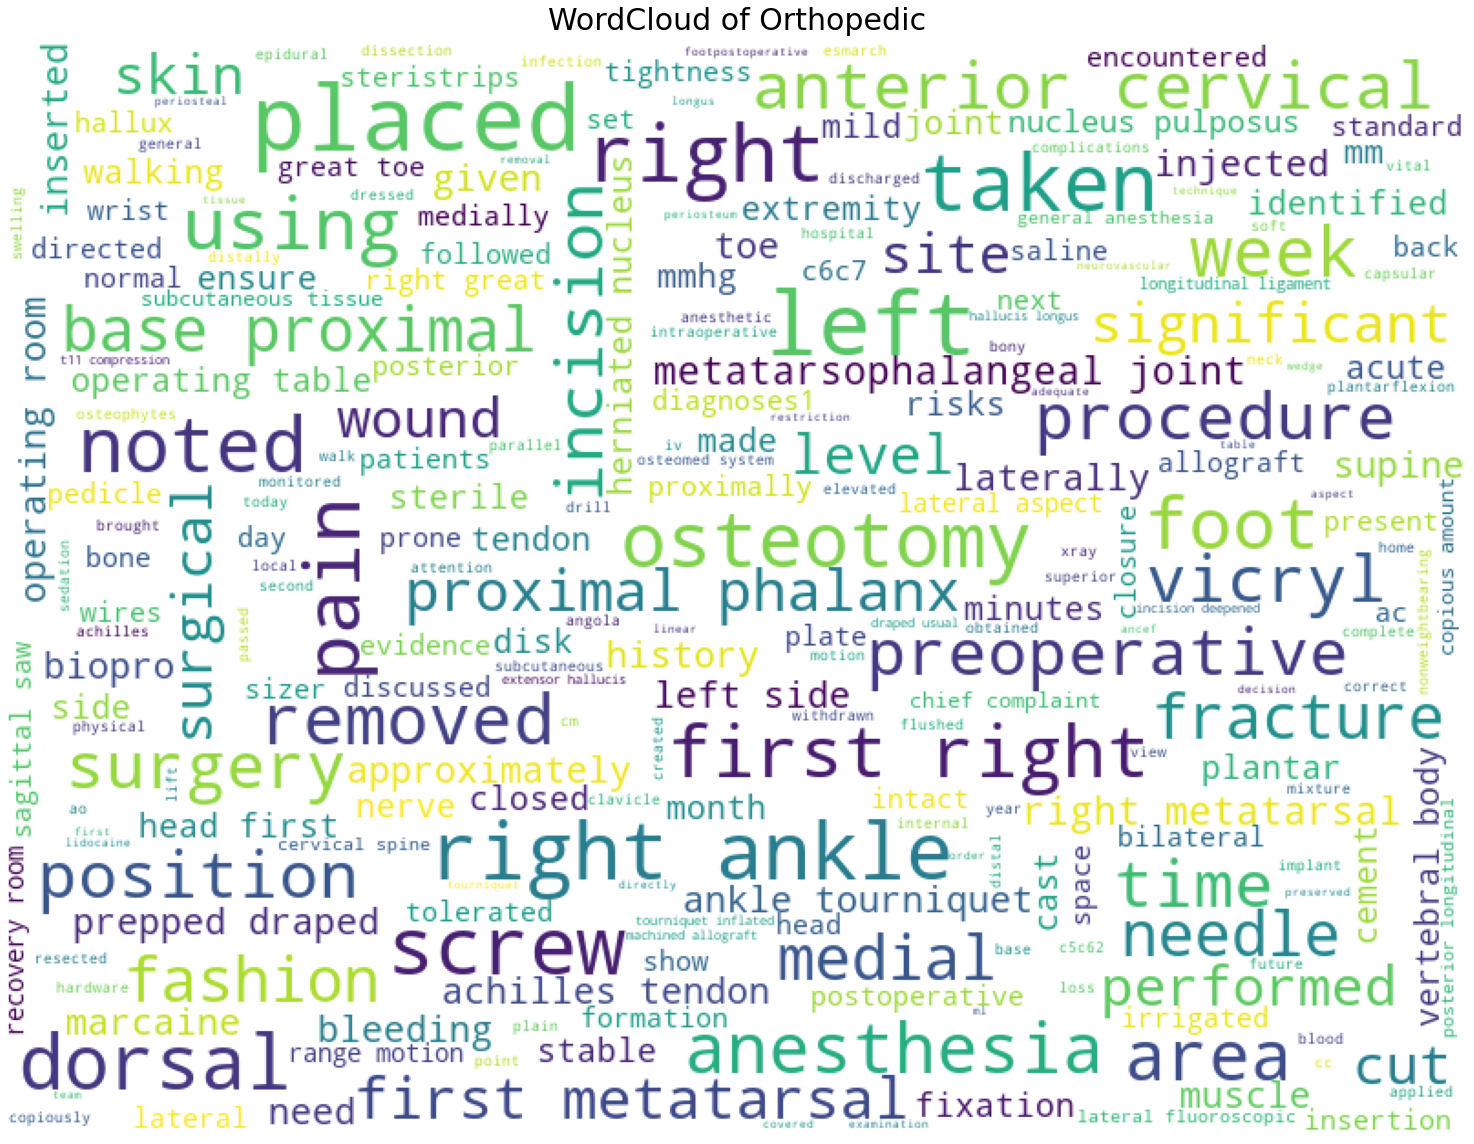

In [33]:
plot_wordcloud(df.loc[df["Package"].str.strip()=="Orthopedic"]["Medical_Description"],
               color='white',
               max_font_size=50,
               title_size=30,
               title="WordCloud of Orthopedic")

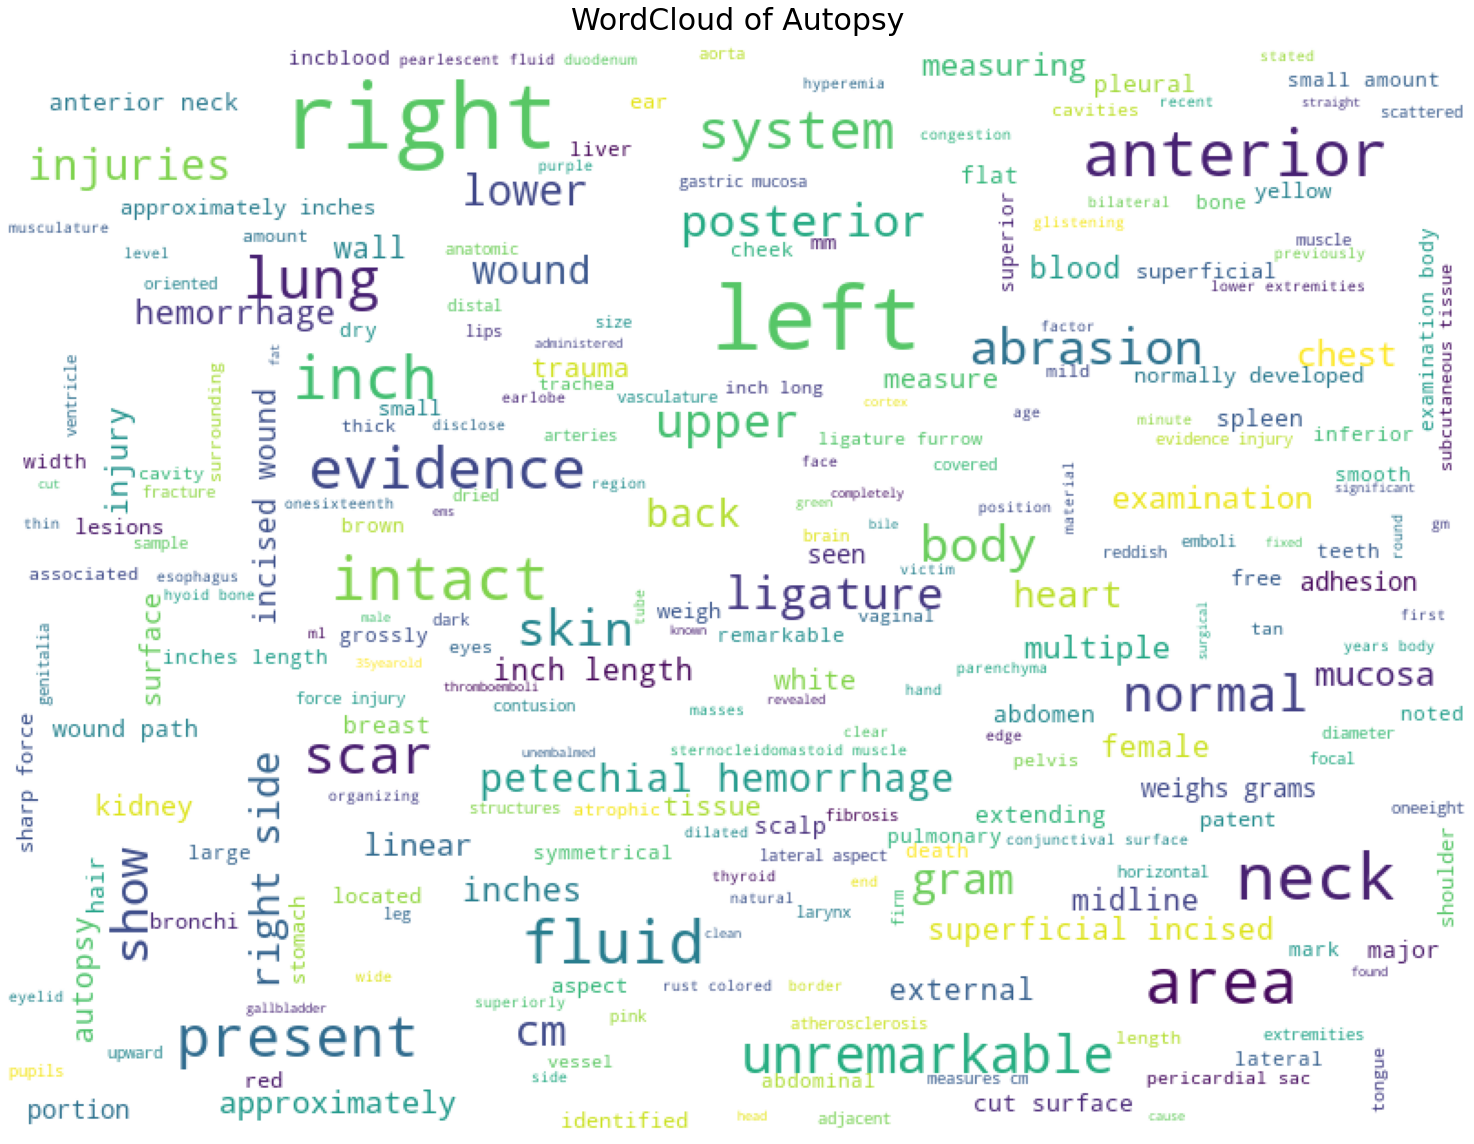

In [34]:
plot_wordcloud(df.loc[df["Package"].str.strip()=="Autopsy"]["Medical_Description"],
               color='white',
               max_font_size=50,
               title_size=30,
               title="WordCloud of Autopsy")